In [1]:
import numpy as np
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes #no la ocupo
from kmodes.kprototypes import KPrototypes
import kmodes.util 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer #no se si la ocupemos finalmente
from scipy.spatial.distance import cdist
import probscale
import plotly.express as px
import seaborn as sn
plt.style.use('seaborn-bright')
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/nubem/Documents/proyecto_dominios/dominios_peru.csv", sep=";")
#df.describe().transpose().to_csv("C:/Users/Heber/Desktop/NUBEMINERA_2020/proyecto_dominios/" + "stats.csv")
df.describe().transpose()

count          mean         std           min           25%  \
X             2453.0  4.135867e+05   97.215170  4.133863e+05  4.135138e+05   
Y             2453.0  8.029747e+06  134.711709  8.029487e+06  8.029654e+06   
Z             2453.0  4.323029e+03   74.261940  4.040564e+03  4.282565e+03   
FROM          2453.0  8.112157e+01   64.072169  0.000000e+00  2.855556e+01   
TO            2453.0  8.852843e+01   64.177580  2.000000e+00  3.600000e+01   
ALT_CODE      2453.0  2.332246e+00    1.340214  1.000000e+00  1.000000e+00   
LENGTH        2453.0  7.406858e+00    0.898915  2.000000e+00  7.285714e+00   
AU            2453.0  1.938895e-01    0.250364  2.500000e-03  2.824215e-02   
AG            2453.0  4.389682e+00    5.867870  1.000000e-01  1.796586e-01   
CU            1498.0  2.994745e-02    0.064957  2.500000e-07  4.600000e-03   
HG            1334.0  7.287069e-04    0.001129  4.000000e-07  1.167675e-04   
AS            1424.0  4.835047e-02    0.066214  6.000000e-04  1.901675e-02   
S             1256.0  3.229579e+00    1.943073  5.238100e-03  1.402235e+00   
AU_UC         2447.0  2.084375e-01    0.316641  2.500000e-03  2.989985e-02   
AG_UC         2447.0  4.910912e+00    9.148595  1.000000e-01  1.961354e-01   
CU_UC         1498.0  2.994745e-02    0.064957  2.500000e-07  4.600000e-03   
HG_UC         1334.0  7.287069e-04    0.001129  4.000000e-07  1.167675e-04   
AS_UC         1424.0  4.835047e-02    0.066214  6.000000e-04  1.901675e-02   
S_UC          1256.0  3.229579e+00    1.943073  5.238100e-03  1.402235e+00   
ID_CUT        2453.0  6.400326e-02    0.244809  0.000000e+00  0.000000e+00   
MINTYPE_CODE  2453.0  2.004484e+00    0.869773  1.000000e+00  1.000000e+00   
DOMINIO_C     2453.0  4.275173e+00    1.857402  1.000000e+00  2.000000e+00   

                       50%           75%           max  
X             4.135854e+05  4.136493e+05  4.138687e+05  
Y             8.029740e+06  8.029842e+06  8.030039e+06  
Z             4.339421e+03  4.376240e+03  4.449960e+03  
FROM          6.700000e+01  1.227692e+02  2.925714e+02  
TO            7.450000e+01  1.302000e+02  3.000000e+02  
ALT_CODE      2.000000e+00  3.000000e+00  6.000000e+00  
LENGTH        7.511111e+00  7.700000e+00  1.115000e+01  
AU            1.155911e-01  2.495570e-01  2.216000e+00  
AG            2.251414e+00  6.380519e+00  4.003165e+01  
CU            7.111190e-03  2.788775e-02  9.125908e-01  
HG            3.477050e-04  8.521825e-04  1.620000e-02  
AS            3.013411e-02  5.207648e-02  7.385652e-01  
S             3.552065e+00  4.342061e+00  8.409001e+00  
AU_UC         1.161039e-01  2.510342e-01  4.279250e+00  
AG_UC         2.291389e+00  6.445117e+00  1.913750e+02  
CU_UC         7.111190e-03  2.788775e-02  9.125908e-01  
HG_UC         3.477050e-04  8.521825e-04  1.620000e-02  
AS_UC         3.013411e-02  5.207648e-02  7.385652e-01  
S_UC          3.552065e+00  4.342061e+00  8.409001e+00  
ID_CUT        0.000000e+00  0.000000e+00  1.000000e+00  
MINTYPE_CODE  2.000000e+00  3.000000e+00  3.000000e+00  
DOMINIO_C     5.000000e+00  6.000000e+00  7.000000e+00

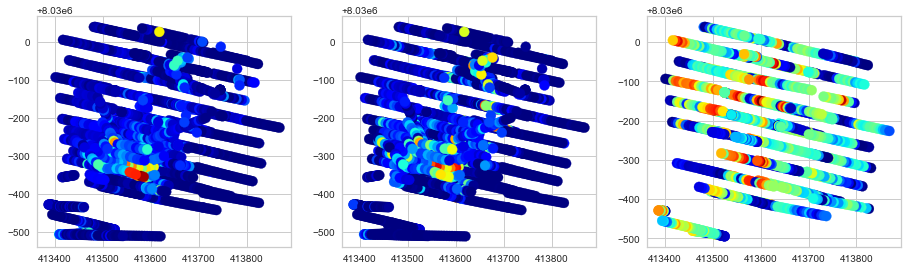

In [62]:
marker_size = 100
cmap= plt.cm.jet

plt.subplot(131)
plt.scatter(df["X"], df["Y"], marker_size, df["AU"], cmap = cmap)

plt.subplot(132)
plt.scatter(df["X"], df["Y"], marker_size, df["AG"], cmap = cmap)

plt.subplot(133)
plt.scatter(df["X"], df["Y"], marker_size, df["S"], cmap = cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=0.8, wspace=0.2, hspace=0.2)

plt.show()

In [4]:
df_oxi = df[df["MINTYPE_CODE"]==1]
df_mix = df[df["MINTYPE_CODE"]==2]
df_sul = df[df["MINTYPE_CODE"]==3]
df_oxi = df_oxi.reset_index(drop=True)
df_mix = df_mix.reset_index(drop=True)
df_sul = df_sul.reset_index(drop=True)

In [5]:
fig = px.scatter_3d(df[df["MINTYPE_CODE"]==1], x="X", y="Y",z="Z", color="DOMINIO_C", 
                    color_continuous_scale=px.colors.sequential.Jet)
fig.update_traces(marker=dict(size=5))
fig.show()

In [19]:
subsetx = ["AU", "AG", "X", "Y", "Z"] #numerical variables WITH coord.
subset = ["AU", "AG"] #AGREGAR Z PARA HACER UN TEST

df_numerical = df_oxi[subset]

X = df_numerical.copy()
X_std = StandardScaler().fit_transform(X) 

df_numerical_trans = pd.DataFrame(X_std)
df_numerical_trans.rename(columns={0: "Au_ppm", 1:"Ag_ppm"}, inplace=True)
#df_numerical_trans.rename(columns={0: "Au_ppm",1: "Ag_ppm", 2:"X", 3:"Y", 4:"Z"}, inplace=True)

#df_numerical_trans["Mineral"] = df["MINTYPE_CODE"]
df_numerical_trans["Alteration"] = df["ALT_CODE"]

data = np.array(df_numerical_trans)

df_numerical_trans.describe().transpose()

count          mean       std       min       25%       50%  \
Au_ppm      922.0 -1.830303e-16  1.000543 -1.024549 -0.643687 -0.270816   
Ag_ppm      922.0  1.873652e-16  1.000543 -1.050255 -0.732157 -0.204708   
Alteration  922.0  2.592191e+00  0.968933  1.000000  2.000000  2.000000   

                 75%       max  
Au_ppm      0.359637  5.964815  
Ag_ppm      0.389366  4.386631  
Alteration  4.000000  6.000000

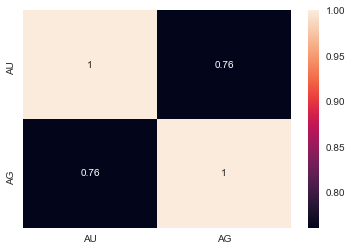

In [63]:
#df_numerical.rename(columns={"Au_ppm": "Au"}, inplace=True)
sn.heatmap(df_numerical.corr(method='pearson'), annot=True)
plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/correlation_spearman_ag.png", dpi=300) 

plt.show()

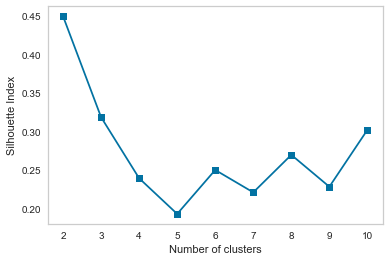

In [21]:
index = []
for k in range(2, 11):
    km = KPrototypes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters = km.fit_predict(data, categorical=[2])
    labels = km.labels_
    index.append(silhouette_score(data, labels, metric='euclidean'))

plt.plot(range(2, 11), index, 'bs-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Index')
plt.grid(False)
plt.xticks(np.arange(min(range(2, 11)), max(range(2, 11))+1, 1.0))
plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/euclidean.png", dpi=300) 
plt.show()

2 541.8483807200084
3 445.72600264635673
4 362.08201486713665
5 315.09431652831563
6 355.4586689064728
7 329.0061220342579
8 312.5014287804512
9 284.29239796746265
10 376.43651096067725


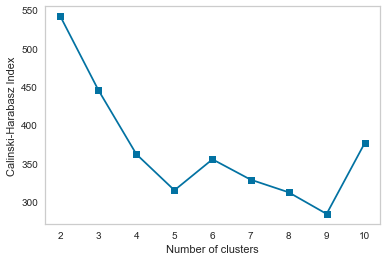

In [22]:
index = []
for k in range(2, 11):
    km = KPrototypes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters = km.fit_predict(data, categorical=[2])
    labels = km.labels_
    index.append(metrics.calinski_harabasz_score(data, labels))
    print(k, metrics.calinski_harabasz_score(data, labels))



plt.plot(range(2, 11), index, 'bs-')
plt.xticks(np.arange(min(range(2, 11)), max(range(2, 11))+1, 1.0))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(False)
#plt.title('Método del Codo k optimo')
#plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/euclidean.png", dpi=300) 

plt.show()

In [29]:
km = KPrototypes(n_clusters=2, init='Huang', n_init=5, verbose=0, random_state=42)

clusters = km.fit_predict(data, categorical=[2])

clusters_x = pd.Series(km.labels_)
clusters_p = list(clusters_x)

df_numerical_trans["clusters"] = clusters_p
df_numerical_trans["Au_original"] = df_oxi["AU"]

df_numerical_trans["X"] = df_oxi["X"]
df_numerical_trans["Y"] = df_oxi["Y"]
df_numerical_trans["Z"] = df_oxi["Z"]

In [30]:
df_numerical_trans["clusters"].replace({0: 1, 1: 2}, inplace=True)
df_numerical_trans.head()

Au_ppm    Ag_ppm  Alteration  clusters  Au_original            X  \
0 -0.989473 -0.968188           2         1     0.013608  413712.5071   
1 -0.994616 -1.033408           2         1     0.011980  413707.4381   
2 -0.965232 -0.960041           2         1     0.021285  413702.3648   
3 -0.911665 -1.035632           2         1     0.038250  413661.3241   
4 -0.652741 -0.922309           2         1     0.120250  413655.8733   

             Y            Z  
0  8029921.231  4420.348151  
1  8029922.612  4415.094277  
2  8029923.977  4409.840412  
3  8029935.926  4440.254865  
4  8029937.475  4434.607811

In [31]:
fig = px.scatter_3d(df_numerical_trans, x="X", y="Y",z="Z", color="clusters", 
                    color_continuous_scale=px.colors.sequential.Jet)
fig.update_traces(marker=dict(size=5))
fig.show()

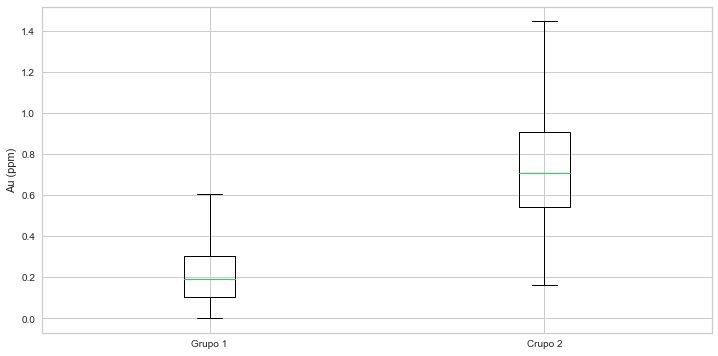

In [33]:
cluster_0 = df_numerical_trans[df_numerical_trans["clusters"]==1]
cluster_1 = df_numerical_trans[df_numerical_trans["clusters"]==2]
#cluster_2 = df_numerical_trans[df_numerical_trans["clusters"]==3]


datax = [cluster_0["Au_original"], cluster_1["Au_original"]]
diamantes = dict(markerfacecolor='r', marker='o')

fig7, ax7 = plt.subplots(figsize=(12,6))
#ax7.set_title('Diagramas de caja por dominio geológico para CuT(%)')
#plt.xlabel("Código dominio geológico")
plt.ylabel("Au (ppm)")
ax7.boxplot(datax, flierprops=diamantes, showfliers=False)

ax7.set_xticklabels(['Grupo 1', 'Crupo 2'])

#ax7.set_xticklabels(['Q', 'VCR_RG','UNDIFF','OCO_TUN','ANT_RG','ARKS_RG','XTUF_RG','TECBX',
#                    'ACT','MGT','MINZON','HBLANT_HYP','MDRT_BC','DRT_BC', "All"])

#plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/boxplot_clusters.png", dpi=300) 


plt.show()

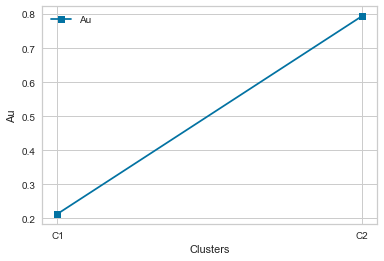

In [34]:
clusters = [cluster_0["Au_original"].mean(), cluster_1["Au_original"].mean()]
name = ["C1","C2"]

plt.subplot(111)
plt.plot(name, clusters, 'bs-', label=("Au"))
#plt.plot([0,2],[df["AU"].mean(),df["AU"].mean()],color = 'red', label="Au average")
plt.legend()

plt.xlabel("Clusters")
plt.ylabel("Au")
#plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/leymedia_por_4_clusters.png", dpi=300) 
plt.show()

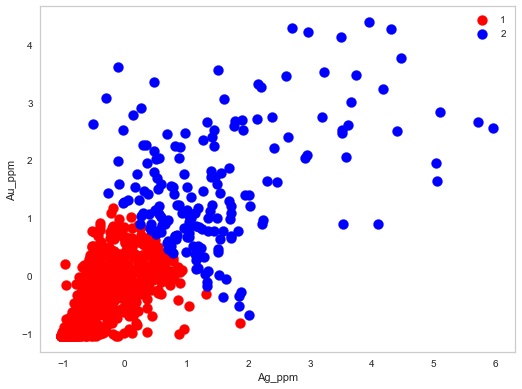

In [35]:
scatter_x = np.array(df_numerical_trans["Au_ppm"])
scatter_y = np.array(df_numerical_trans["Ag_ppm"])
group = np.array(df_numerical_trans["clusters"])
cdict = {1: 'red', 2: 'blue'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.xlabel("Ag_ppm")
plt.ylabel("Au_ppm")
plt.grid(False)
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1.2, wspace=0, hspace=0)

plt.show()

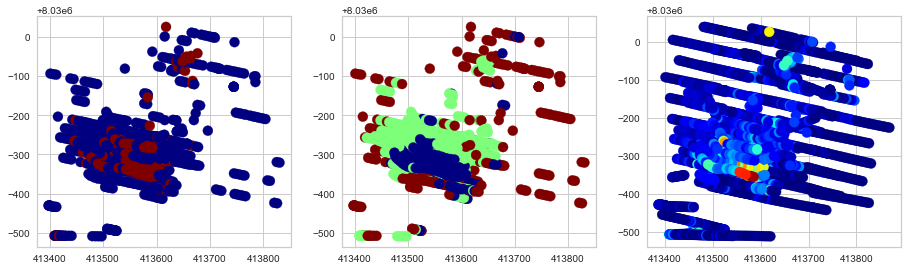

In [64]:
marker_size = 100
cmap= plt.cm.jet

plt.subplot(131)
plt.scatter(df_numerical_trans["X"], df_numerical_trans["Y"], marker_size, df_numerical_trans["clusters"], cmap = cmap)

plt.subplot(132)
plt.scatter(df_oxi["X"], df_oxi["Y"], marker_size, df_oxi["DOMINIO_C"], cmap = cmap)

plt.subplot(133)
plt.scatter(df["X"], df["Y"], marker_size, df["AU"], cmap = cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=0.8, wspace=0.2, hspace=0.2)

plt.show()

In [66]:
df_numerical_trans.describe().transpose()

count          mean        std           min           25%  \
Au_ppm       922.0 -1.830303e-16   1.000543 -1.024549e+00 -6.436869e-01   
Ag_ppm       922.0  1.873652e-16   1.000543 -1.050255e+00 -7.321574e-01   
Alteration   922.0  2.592191e+00   0.968933  1.000000e+00  2.000000e+00   
clusters     922.0  1.196312e+00   0.397423  1.000000e+00  1.000000e+00   
Au_original  922.0  3.269700e-01   0.316867  2.500000e-03  1.231173e-01   
X            922.0  4.135651e+05  80.517713  4.133974e+05  4.135112e+05   
Y            922.0  8.029716e+06  98.288377  8.029491e+06  8.029665e+06   
Z            922.0  4.361575e+03  40.458328  4.212854e+03  4.336162e+03   

                      50%           75%           max  
Au_ppm      -2.708163e-01  3.596371e-01  5.964815e+00  
Ag_ppm      -2.047084e-01  3.893662e-01  4.386631e+00  
Alteration   2.000000e+00  4.000000e+00  6.000000e+00  
clusters     1.000000e+00  1.000000e+00  2.000000e+00  
Au_original  2.412037e-01  4.408655e-01  2.216000e+00  
X            4.135589e+05  4.136109e+05  4.138304e+05  
Y            8.029706e+06  8.029753e+06  8.030026e+06  
Z            4.362065e+03  4.390921e+03  4.449960e+03

In [40]:
df_numerical_trans[df_numerical_trans["clusters"]==2]["Alteration"].sort_values().unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

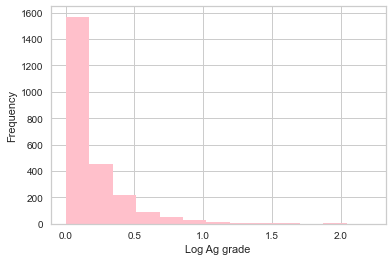

In [41]:
#aa = np.log(df["AU"])

plt.subplot(111)
plt.hist(df["AU"], color="pink", bins="sturges", histtype="barstacked",log=False, 
         density=False,cumulative=False)


plt.xlabel("Log Ag grade")
plt.ylabel("Frequency")
#plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/histograma_total.png", dpi=300) 
plt.show()

In [42]:
df["ALT_CODE"].sort_values().unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [43]:
stats_lito = df.groupby(["ALT_CODE"]).describe() #estadísticas por codigo de litología
stats_lito["AU"].to_csv("C:/Users/nubem/Documents/proyecto_dominios/" + "stats_dataset_ag.csv")
stats_lito["AU"]

count      mean       std       min       25%       50%       75%  \
ALT_CODE                                                                       
1          702.0  0.301716  0.217722  0.003047  0.150071  0.241750  0.395402   
2         1061.0  0.094373  0.159579  0.002500  0.009547  0.038250  0.111218   
3          141.0  0.016479  0.040022  0.002500  0.002500  0.003676  0.007048   
4          394.0  0.169706  0.128959  0.002519  0.088681  0.133647  0.201623   
5           32.0  0.176410  0.110094  0.011489  0.108283  0.174999  0.252125   
6          123.0  0.722304  0.484570  0.055179  0.397942  0.566333  0.933000   

               max  
ALT_CODE            
1         1.578802  
2         1.442000  
3         0.262482  
4         0.869000  
5         0.360000  
6         2.216000

In [44]:
stats_alte = df.groupby(["MINTYPE_CODE"]).describe() #estadísticas por codigo de litología
stats_alte["AU"].to_csv("C:/Users/nubem/Documents/proyecto_dominios/" + "stats_dataset_ALTE_ag.csv")
stats_alte["AU"]

count      mean       std     min       25%       50%       75%  \
MINTYPE_CODE                                                                    
1             922.0  0.326970  0.316867  0.0025  0.123117  0.241204  0.440865   
2             598.0  0.170242  0.153521  0.0025  0.064682  0.133220  0.222296   
3             933.0  0.077535  0.138426  0.0025  0.006961  0.034272  0.097017   

                   max  
MINTYPE_CODE            
1             2.216000  
2             1.063455  
3             1.370926

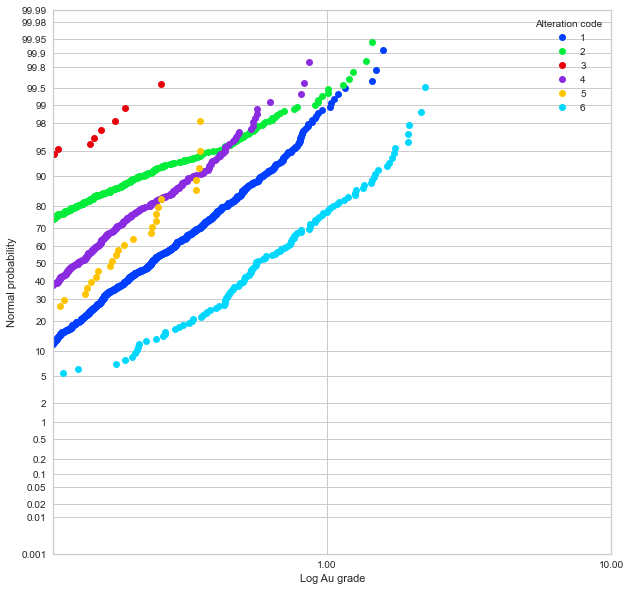

In [45]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(figsize=(10,10))
for category in df.groupby("ALT_CODE").groups.keys():
    xData = df.groupby("ALT_CODE").get_group(category)["AU"].sort_values()
    probscale.probplot(xData, ax=ax, probax="y", datascale="log",label=category)
ax.legend(title="Alteration code")
ax.set_ylim(bottom=0.001, top=99.99)
ax.set_xlim(left=0.11, right=1e1)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel("Log Au grade")
ax.set_ylabel("Normal probability")
ax.set_title("")
plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/probability_litos_datasetag.png", dpi=300) 
plt.show()

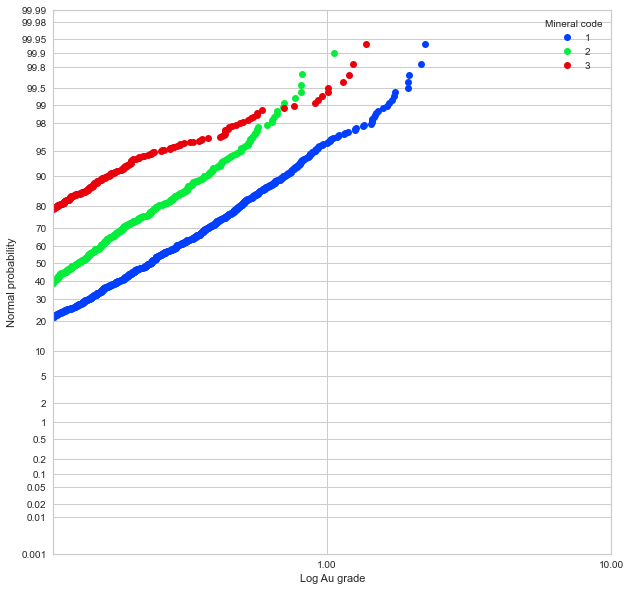

In [46]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(figsize=(10,10))
for category in df.groupby("MINTYPE_CODE").groups.keys():
    xData = df.groupby("MINTYPE_CODE").get_group(category)["AU"].sort_values()
    probscale.probplot(xData, ax=ax, probax="y", datascale="log",label=category)
ax.legend(title="Mineral code")
ax.set_ylim(bottom=0.001, top=99.99)
ax.set_xlim(left=0.11, right=1e1)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel("Log Au grade")
ax.set_ylabel("Normal probability")
ax.set_title("")
plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/probability_altes_datasetag.png", dpi=300) 
plt.show()

In [47]:
lito_1 = df[df["MINTYPE_CODE"]==1]; lito_2 = df[df["MINTYPE_CODE"]==2]; lito_3 = df[df["MINTYPE_CODE"]==3]

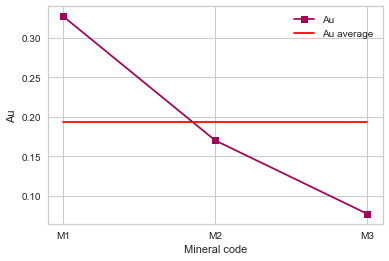

In [48]:
litos = [lito_1["AU"].mean(), lito_2["AU"].mean(), lito_3["AU"].mean()]
names_lito = ["M1","M2","M3"]

plt.subplot(111)
plt.plot(names_lito, litos,'ms-',label=("Au"))
plt.plot([0,2],[df["AU"].mean(),df["AU"].mean()],color = 'red', label="Au average")
plt.legend()
plt.xlabel("Mineral code")
plt.ylabel("Au")

#plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/leymedia_por_lito.png", dpi=300) 
plt.show()

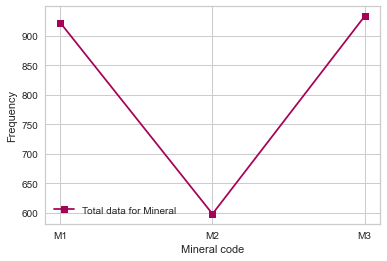

In [49]:
litos2 = [lito_1["AU"].count(), lito_2["AU"].count(), lito_3["AU"].count()]
names_lito = ["M1","M2","M3"]

plt.subplot(111)
plt.plot(names_lito, litos2,'ms-',label=("Total data for Mineral"))
#plt.plot([0,9],[df["CuT"].mean(),df["CuT"].mean()],color = 'red', label="Copper grade average")
plt.legend()
plt.xlabel("Mineral code")
plt.ylabel("Frequency")

#plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/count_lito.png", dpi=300) 
plt.show()

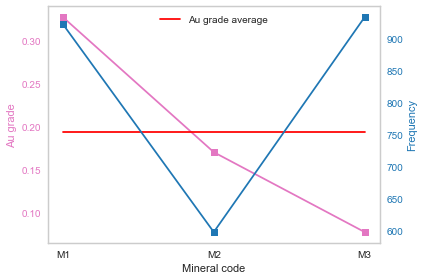

In [50]:
# Create some mock data
t = names_lito
data1 = litos
data2 = litos2

fig, ax1 = plt.subplots()

color = 'tab:pink'
ax1.set_xlabel('Mineral code')
ax1.set_ylabel('Au grade', color=color)
ax1.plot(t, data1, 's-', color=color)
plt.plot([0,2],[df["AU"].mean(),df["AU"].mean()],color = 'red', label="Au grade average")
plt.legend(loc='upper center')
plt.grid(False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Frequency', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, 's-', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.grid(False)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/grafico_doble_lito.png", dpi=300) 
plt.show()

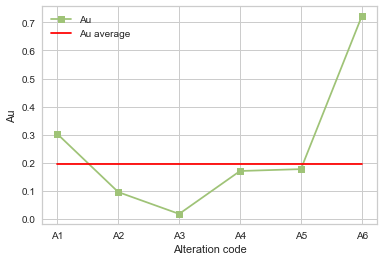

In [51]:
alte_1 = df[df["ALT_CODE"]==1];alte_2 = df[df["ALT_CODE"]==2];alte_3 = df[df["ALT_CODE"]==3];
alte_4 = df[df["ALT_CODE"]==4];alte_5 = df[df["ALT_CODE"]==5];alte_6 = df[df["ALT_CODE"]==6]

names_alte = ["A1","A2","A3","A4","A5","A6"]
altes = [alte_1["AU"].mean(), alte_2["AU"].mean(),alte_3["AU"].mean(),alte_4["AU"].mean(),alte_5["AU"].mean()
        ,alte_6["AU"].mean()]

plt.subplot(111)
plt.plot(names_alte, altes,'gs-', label=("Au"))
plt.plot([0,5],[df["AU"].mean(),df["AU"].mean()],color = 'red', label="Au average")
plt.legend()
plt.xlabel("Alteration code")
plt.ylabel("Au")

#plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/leymedia_por_alte.png", dpi=300) 
plt.show()

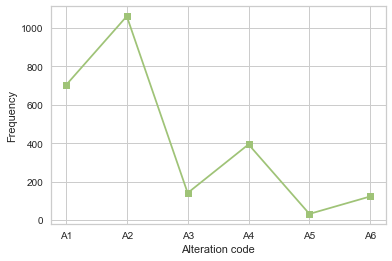

In [52]:
names_alte = ["A1","A2","A3","A4","A5","A6"]
altes2 = [alte_1["AU"].count(), alte_2["AU"].count(),alte_3["AU"].count(),alte_4["AU"].count(),alte_5["AU"].count(),
        alte_6["AU"].count()]

plt.subplot(111)
plt.plot(names_alte, altes2,'gs-', label=("Au"))

plt.xlabel("Alteration code")
plt.ylabel("Frequency")

#plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/count_alte.png", dpi=300) 
plt.show()

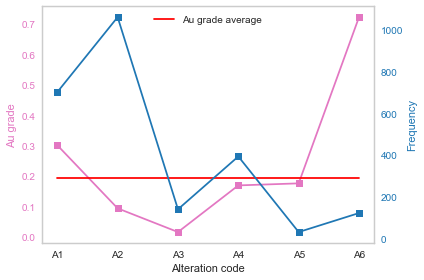

In [53]:
# Create some mock data
t = names_alte
data1 = altes
data2 = altes2

fig, ax1 = plt.subplots()

color = 'tab:pink'
ax1.set_xlabel('Alteration code')
ax1.set_ylabel('Au grade', color=color)
ax1.plot(t, data1, 's-', color=color)
plt.plot([0,5],[df["AU"].mean(),df["AU"].mean()],color = 'red', label="Au grade average")
plt.legend(loc='upper center')
plt.grid(False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Frequency', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, 's-', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.grid(False)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/grafico_doble_alte.png", dpi=300) 
plt.show()

In [54]:
df_numerical_trans.head()

Au_ppm    Ag_ppm  Alteration  clusters  Au_original            X  \
0 -0.989473 -0.968188           2         1     0.013608  413712.5071   
1 -0.994616 -1.033408           2         1     0.011980  413707.4381   
2 -0.965232 -0.960041           2         1     0.021285  413702.3648   
3 -0.911665 -1.035632           2         1     0.038250  413661.3241   
4 -0.652741 -0.922309           2         1     0.120250  413655.8733   

             Y            Z  
0  8029921.231  4420.348151  
1  8029922.612  4415.094277  
2  8029923.977  4409.840412  
3  8029935.926  4440.254865  
4  8029937.475  4434.607811

In [55]:
lito_1 = df[df["MINTYPE_CODE"]==1]; lito_2 = df[df["MINTYPE_CODE"]==2]; lito_3 = df[df["MINTYPE_CODE"]==3]

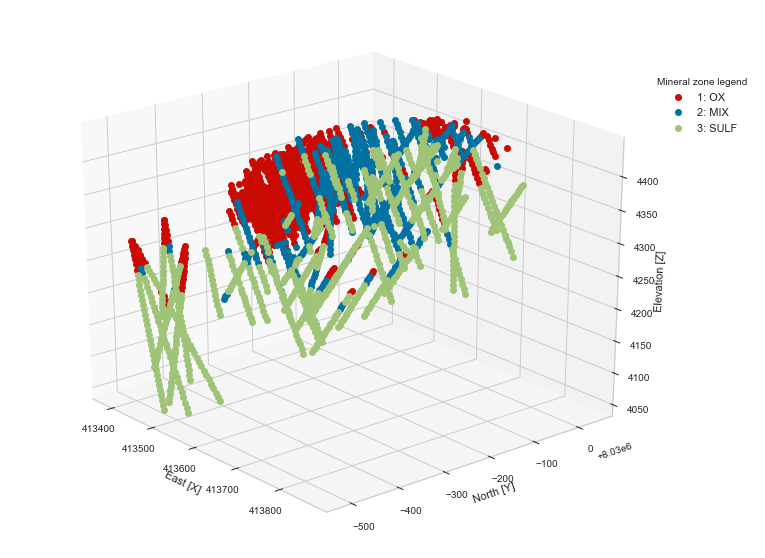

In [56]:
colors= ["r", "b", "g"]
fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.view_init(azim=320, elev=25)

ax.plot(lito_1["X"], lito_1["Y"], lito_1["Z"], 'o', color=colors[0], label='1: OX')
ax.plot(lito_2["X"], lito_2["Y"], lito_2["Z"], 'o', color=colors[1], label='2: MIX')
ax.plot(lito_3 ["X"], lito_3 ["Y"], lito_3 ["Z"], 'o', color=colors[2], label='3: SULF')

ax.set_xlabel("East [X]")
ax.set_ylabel("North [Y]")
ax.set_zlabel("Elevation [Z]")
#ax.set_title("Litología Mina Justa - MARCOBRE")
ax.legend(loc='upper right', numpoints=1, ncol=1, fontsize=11, title="Mineral zone legend",borderpad=1,bbox_to_anchor=(1.13, 0.9))
plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/muestras_litologia_3d.png", dpi=300) 

plt.show()